
# Set up the notebook

In [1]:

%pprint

Pretty printing has been turned OFF


In [2]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, osp.join(os.pardir, 'py'))

from stats_scraping_utils import StatsScrapingUtilities
from storage import Storage
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns
import numpy as np
import re
from scipy.stats import pearsonr
%matplotlib inline

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

s = Storage()
ssu = StatsScrapingUtilities(s=s)


----


# Prepare the Countries scatterplot

In [3]:

all_countries_df = s.load_object('all_countries_df')

In [4]:

import os

[f's.{fn}' for fn in dir(s) if 'csv' in fn]

['s.csv_exists', 's.data_csv_folder', 's.load_csv', 's.saves_csv_folder']

In [ ]:

for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pkl'):
        df_name = file_name.split('.')[0]
        df = eval(f"s.load_object('{df_name}')")
        columns_list = [cn for cn in df.columns if (('murder' in str(cn)) or ('cide' in str(cn)))]
        if columns_list:
            print()
            print(df_name)
            print(columns_list)


## Clean and prepare Effectiveness Countries dataset

In [36]:

%run ../load_magic/lists.py
import pandas as pd

In [67]:

if s.pickle_exists('effectiveness_countries_df'):
    effectiveness_df = s.load_object('effectiveness_countries_df')
else:
    csv_path = os.path.join(s.data_csv_folder, 'Government_Effectiveness_by_Country.csv')
    effectiveness_df = pd.read_csv(os.path.abspath(csv_path), encoding=s.encoding_type)
    effectiveness_df.columns = ['country_name', 'country_code', 'series_name', 'series_code',
                                'effectiveness_2006', 'effectiveness_2007', 'effectiveness_2008',
                                'effectiveness_2009', 'effectiveness_2010', 'effectiveness_2011',
                                'effectiveness_2012', 'effectiveness_2013', 'effectiveness_2014',
                                'effectiveness_2015', 'effectiveness_2016', 'effectiveness_2017',
                                'effectiveness_2018', 'effectiveness_2019', 'effectiveness_2020']
    mask_series = (effectiveness_df.effectiveness_2020 == os.pardir)
    effectiveness_df.loc[mask_series, 'effectiveness_2020'] = np.nan
    effectiveness_df.dropna(axis='index', how='any', subset=['country_name', 'effectiveness_2020'], inplace=True)
    effectiveness_df.effectiveness_2020 = effectiveness_df.effectiveness_2020.map(lambda x: float(str(x)))
    df = check_for_typos(all_countries_df.country_name.unique(), effectiveness_df.country_name.unique(), verbose=False)
    mask_series = (df.max_similarity < 1.)
    for row_index, row_series in df[mask_series].sort_values('max_similarity', ascending=False).head(7).iterrows():
        country_name = row_series.left_item
        fix_me = row_series.right_item
        mask_series = (effectiveness_df.country_name == fix_me)
        effectiveness_df.loc[mask_series, 'country_name'] = country_name
    
    country_name = 'Venezuela'
    fix_me = 'Venezuela, RB'
    mask_series = (effectiveness_df.country_name == fix_me)
    effectiveness_df.loc[mask_series, 'country_name'] = country_name

    country_name = 'São Tomé & Príncipe'
    fix_me = 'Sao Tome and Principe'
    mask_series = (effectiveness_df.country_name == fix_me)
    effectiveness_df.loc[mask_series, 'country_name'] = country_name

    country_name = 'US Virgin Islands'
    fix_me = 'Virgin Islands (U.S.)'
    mask_series = (effectiveness_df.country_name == fix_me)
    effectiveness_df.loc[mask_series, 'country_name'] = country_name

    country_name = 'Bahamas'
    fix_me = 'Bahamas, The'
    mask_series = (effectiveness_df.country_name == fix_me)
    effectiveness_df.loc[mask_series, 'country_name'] = country_name

    country_name = 'British Virgin Islands'
    fix_me = 'Virgin Islands (U.S.)'
    mask_series = (effectiveness_df.country_name == fix_me)
    effectiveness_df.loc[mask_series, 'country_name'] = country_name
    s.store_objects(effectiveness_countries_df=effectiveness_df)
mask_series = (effectiveness_df.series_name == 'Government Effectiveness: Percentile Rank')
columns_list = ['country_name', 'effectiveness_2020']
effectiveness_df[mask_series][columns_list].sample(5)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\effectiveness_countries_df.pkl


,country_name,effectiveness_2020
374,Eswatini,24.038462
500,"Hong Kong SAR, China",95.192307
1166,Trinidad & Tobago,60.576923
1034,Slovenia,85.576920
1202,Ukraine,38.942307


In [31]:

mask_series = (df.max_similarity < 1.)
df[mask_series].sort_values('max_similarity', ascending=False).head(20)

,left_item,right_item,max_similarity
82,Gambia,Zambia,0.833333
160,Norfolk Island,Cook Islands,0.769231
27,Brunei,Burundi,0.769231
236,British Virgin Islands,US Virgin Islands,0.769231
199,Slovakia,Slovenia,0.750000
105,Iran,Iraq,0.750000
14,Åland Islands,Cayman Islands,0.740741
209,Syria,Serbia,0.727273
71,Faroe Islands,Cook Islands,0.720000
225,Taiwan,Thailand,0.714286


In [24]:

mask_series = (df.max_similarity < 1.)
for row_index, row_series in df[mask_series].sort_values('max_similarity', ascending=False).head(7).iterrows():
    country_name = row_series.left_item
    fix_me = row_series.right_item
    mask_series = (effectiveness_df.country_name == fix_me)
    effectiveness_df.loc[mask_series, 'country_name'] = country_name

In [28]:

mask_series = (df.max_similarity < 1.)
for row_index, row_series in df[mask_series].sort_values('max_similarity', ascending=False).head(20).iterrows():
    country_name = row_series.left_item
    fix_me = row_series.right_item
    print(f'''
country_name = '{country_name}'
fix_me = '{fix_me}'
mask_series = (effectiveness_df.country_name == fix_me)
effectiveness_df.loc[mask_series, 'country_name'] = country_name''')


country_name = 'Gambia'
fix_me = 'Zambia'
mask_series = (effectiveness_df.country_name == fix_me)
effectiveness_df.loc[mask_series, 'country_name'] = country_name

country_name = 'Venezuela'
fix_me = 'Venezuela, RB'
mask_series = (effectiveness_df.country_name == fix_me)
effectiveness_df.loc[mask_series, 'country_name'] = country_name

country_name = 'Brunei'
fix_me = 'Burundi'
mask_series = (effectiveness_df.country_name == fix_me)
effectiveness_df.loc[mask_series, 'country_name'] = country_name

country_name = 'Norfolk Island'
fix_me = 'Cook Islands'
mask_series = (effectiveness_df.country_name == fix_me)
effectiveness_df.loc[mask_series, 'country_name'] = country_name

country_name = 'São Tomé & Príncipe'
fix_me = 'Sao Tome and Principe'
mask_series = (effectiveness_df.country_name == fix_me)
effectiveness_df.loc[mask_series, 'country_name'] = country_name

country_name = 'Slovakia'
fix_me = 'Slovenia'
mask_series = (effectiveness_df.country_name == fix_me)
effectiveness_df.loc[mas


## Clean and prepare Trust Countries dataset

In [51]:

if s.pickle_exists('trust_countries_df'):
    trust_df = s.load_object('trust_countries_df')
else:
    csv_path = os.path.join(s.data_csv_folder, 'Government_Trust_by_Country.csv')
    trust_df = pd.read_csv(os.path.abspath(csv_path), encoding=s.encoding_type)
    trust_df.columns = ['country_code', 'indicator', 'subject', 'measure', 'frequency', 'survey_year', 'trust_value', 'flag_codes']
    trust_df.dropna(axis='index', how='any', subset=['country_code', 'survey_year'], inplace=True)
    s.store_objects(trust_countries_df=trust_df)
mask_series = (trust_df.survey_year == 2020)
columns_list = ['country_code', 'trust_value']
trust_df[mask_series][columns_list].sample(5)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\trust_countries_df.pkl


,country_code,trust_value
573,LVA,30.678906
336,POL,27.311661
183,ISL,59.240728
125,FRA,41.040665
215,ITA,37.451577



## Create the Countries scatterplot

In [69]:

# Explanatory variable
xname = 'trust_value'

# Response variable
yname = 'effectiveness_2020'

# Remove NaNs
columns_list = ['country_code', xname, yname]
trust_mask_series = (trust_df.survey_year == 2020)
effectiveness_mask_series = (effectiveness_df.series_name == 'Government Effectiveness: Percentile Rank')
df = effectiveness_df[effectiveness_mask_series].merge(trust_df[trust_mask_series], on='country_code', how='inner')[columns_list].dropna()
xdata = df[xname]
ydata = df[yname]

In [76]:

country_code_dict = effectiveness_df.set_index('country_code').country_name.to_dict()

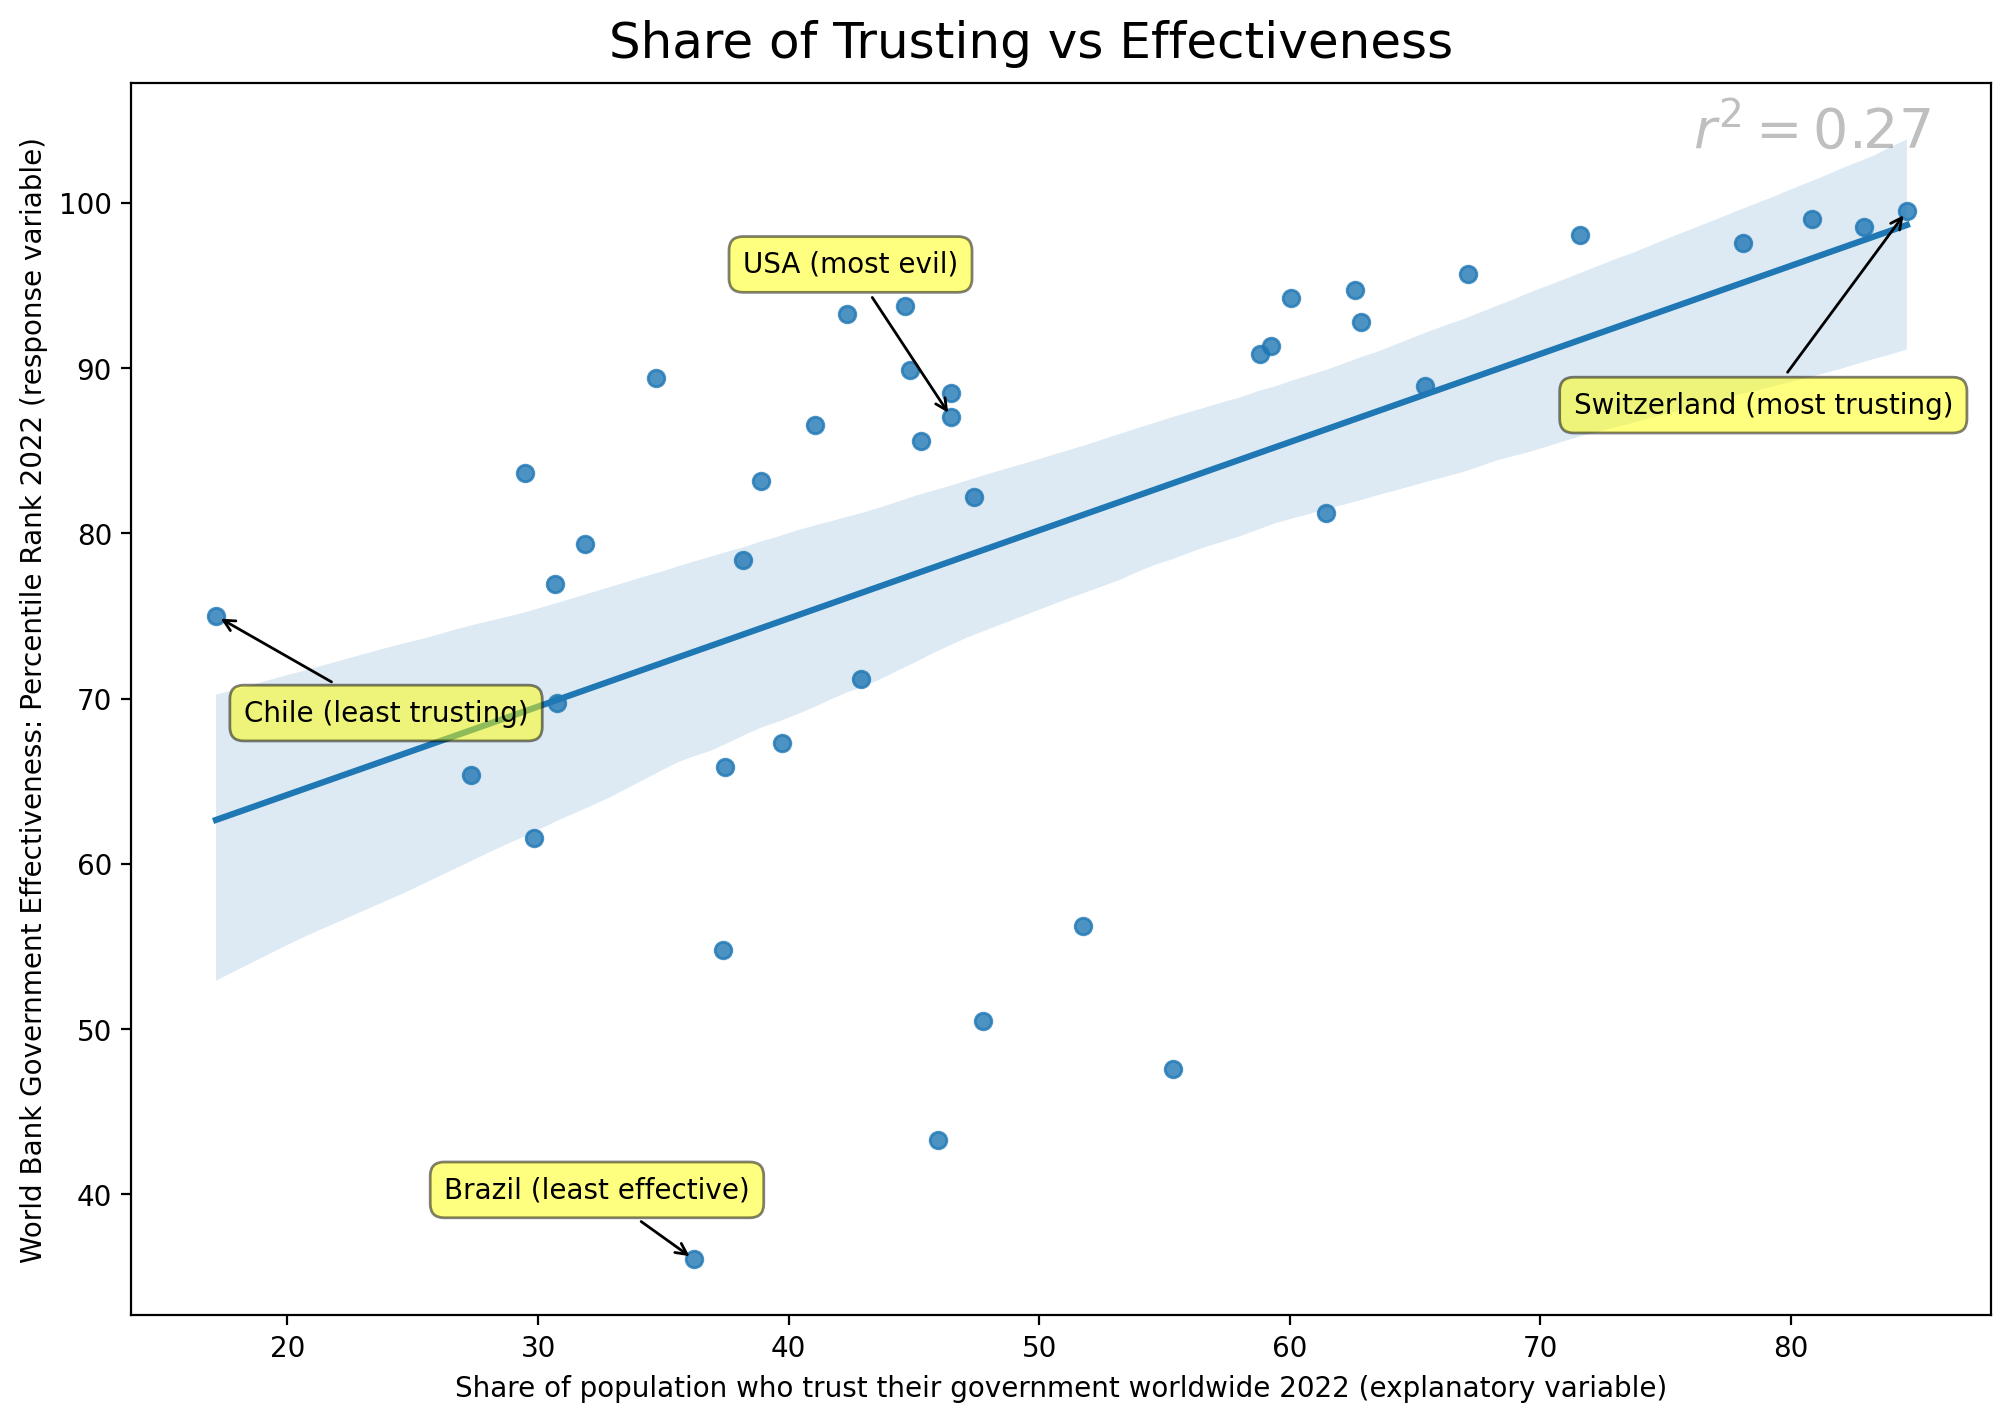

In [84]:

# First order (linear) scatterplot
fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=df)
xlabel_str = 'Share of population who trust their government worldwide 2022 (explanatory variable)'
xlabel_text = plt.xlabel(xlabel_str)
ylabel_str = 'World Bank Government Effectiveness: Percentile Rank 2022 (response variable)'
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_trusting = xdata.min()
most_trusting = xdata.max()
most_effective = ydata.max()
least_effective = ydata.min()
for label, x, y in zip(df['country_code'], xdata, ydata):
    if (x == least_trusting):
        annotation = plt.annotate('{} (least trusting)'.format(country_code_dict[label]),
                                  xy=(x, y), xytext=(10, -40), **kwargs)
    elif (x == most_trusting):
        annotation = plt.annotate('{} (most trusting)'.format(country_code_dict[label]),
                                  xy=(x, y), xytext=(-120, -75), **kwargs)
    elif (y == most_effective):
        annotation = plt.annotate('{} (most effective)'.format(country_code_dict[label]),
                                  xy=(x, y), xytext=(35, -35), **kwargs)
    elif (y == least_effective):
        annotation = plt.annotate('{} (least effective)'.format(country_code_dict[label]),
                                  xy=(x, y), xytext=(-90, 20), **kwargs)
    elif (label == 'USA'):
        annotation = plt.annotate('{} (most evil)'.format(label),
                                  xy=(x, y), xytext=(-75, 50), **kwargs)
# Add r-squared
plt.text(0.825, 0.85, r'$r^2 = {0:.2}$'.format(pearsonr(xdata, ydata)[0] ** 2), fontsize=20, alpha=0.25,
         horizontalalignment='center', verticalalignment='center', transform=fig.transFigure)

title_str = 'Share of Trusting vs Effectiveness'
title_obj = fig.suptitle(title_str, fontsize=18, y=0.92)


----